In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,f1_score,recall_score,roc_curve
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [ ]:
heart= pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


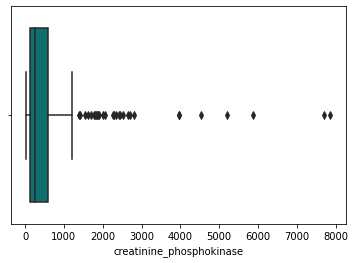

In [ ]:
sns.boxplot(x = heart.creatinine_phosphokinase, color = 'teal')
plt.show()

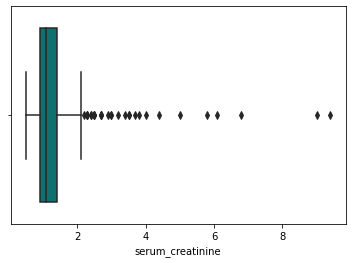

In [ ]:
sns.boxplot(x = heart.serum_creatinine, color = 'teal')
plt.show()

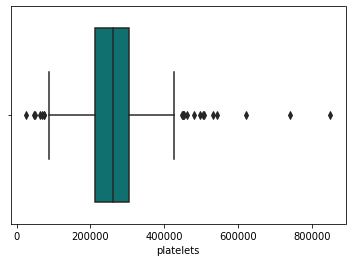

In [ ]:
sns.boxplot(x = heart.platelets	, color = 'teal')
plt.show()

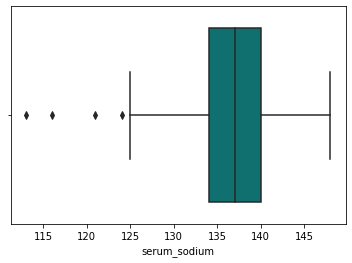

In [ ]:
sns.boxplot(x = heart.serum_sodium, color = 'teal')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


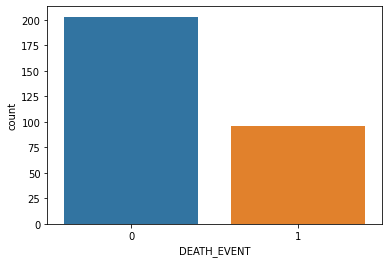

In [ ]:
sns.countplot(heart['DEATH_EVENT'])

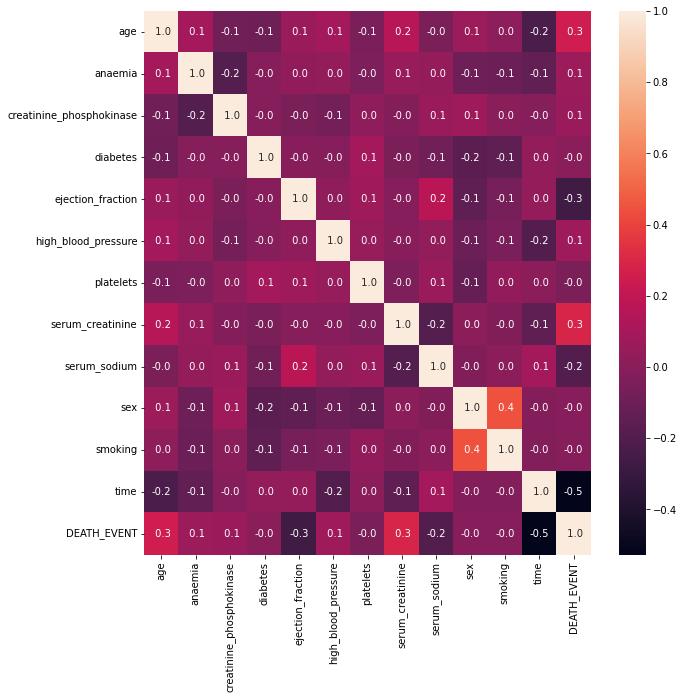

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(heart.corr(),annot=True,fmt=' .1f')

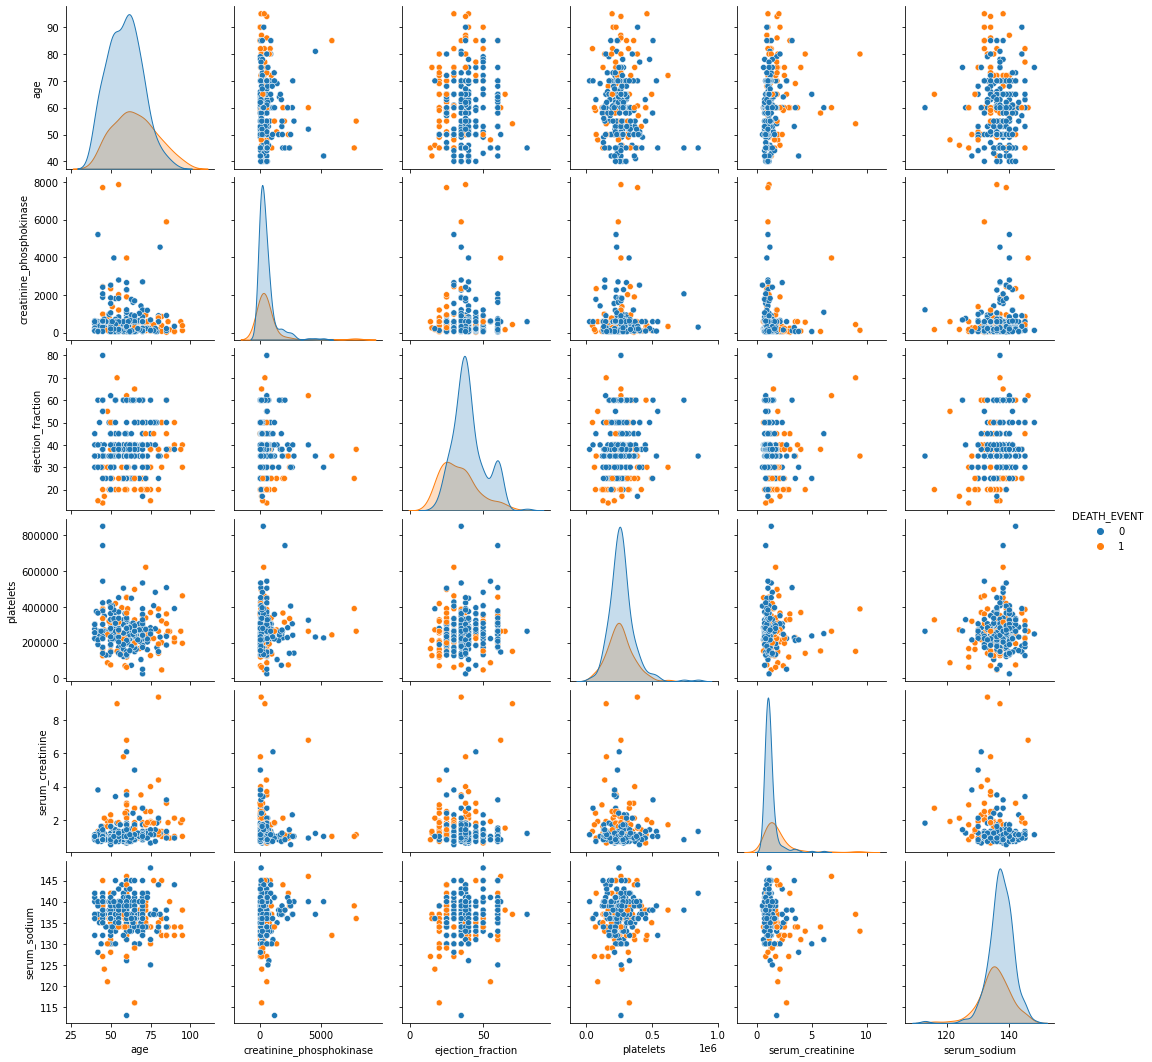

In [ ]:
sns.pairplot(heart, hue = 'DEATH_EVENT', vars = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium'] )


In [ ]:
X= heart.drop(['DEATH_EVENT'],axis=1)
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [ ]:
y = heart['DEATH_EVENT']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

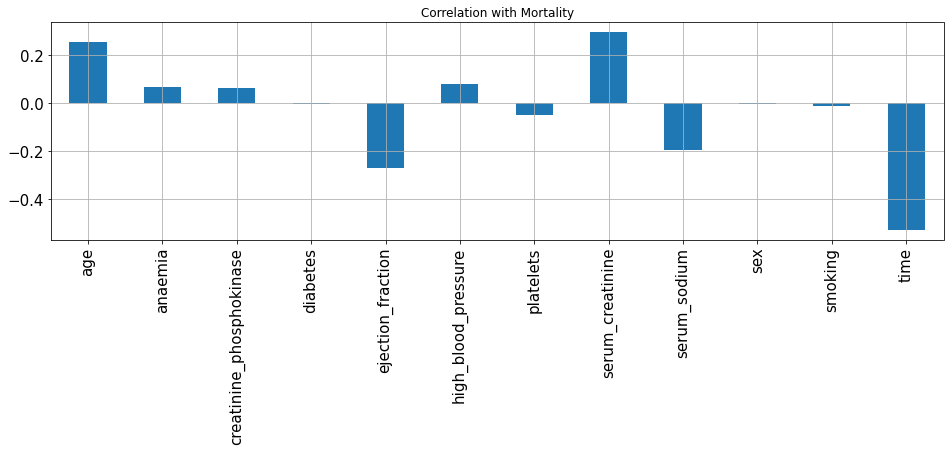

In [ ]:
X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Mortality", fontsize = 15,
        rot = 90, grid = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [ ]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.759259,0.0,0.576295,0.0,0.437500,0.0,0.249606,0.076404,0.685714,1.0,1.0,0.373188
1,0.185185,0.0,0.020669,0.0,0.333333,0.0,0.292035,0.022472,0.800000,1.0,1.0,0.391304
2,0.092593,0.0,0.071319,0.0,0.437500,0.0,0.436295,0.056180,0.914286,1.0,0.0,0.206522
3,0.222222,0.0,0.021306,1.0,0.500000,0.0,0.432659,0.056180,0.771429,1.0,1.0,0.920290
4,0.185185,1.0,0.003955,0.0,0.541667,0.0,0.307795,0.033708,0.800000,1.0,0.0,0.891304


In [ ]:
X_test = pd.DataFrame(scaler.fit_transform(X_test))
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,1.0,0.010461,0.0,0.384615,0.0,0.368313,0.012048,0.736842,0.0,0.0,0.646209
1,0.375764,1.0,0.020147,1.0,0.384615,1.0,0.316872,0.036145,0.473684,0.0,0.0,0.592058
2,0.090909,1.0,0.180938,0.0,0.230769,0.0,0.183128,0.048193,0.526316,1.0,0.0,0.010830
3,0.272727,0.0,0.103642,1.0,0.307692,1.0,0.666667,0.000000,0.684211,0.0,0.0,0.682310
4,0.545455,0.0,0.035839,0.0,0.230769,0.0,0.259259,0.060241,0.263158,1.0,0.0,0.729242


MODEL **CREATION**

In [ ]:
#logistic regression


lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)
y_pred_lr_train = lr.predict(X_train)
y_pred_lr_test = lr.predict(X_test)

In [ ]:
#decision tree

dtr = DecisionTreeClassifier(criterion='entropy', random_state=1,class_weight="balanced")#criterion='gini', random_state=1,class_weight='balanced'
dtr.fit(X_train,y_train)
y_pred_dtr_train = dtr.predict(X_train)
y_pred_dtr_test = dtr.predict(X_test)

In [ ]:
#random classifier
rf = RandomForestClassifier(criterion='entropy',n_estimators=100,class_weight="balanced")#criterion='entropy',n_estimators=100,class_weight='balanced'
rf.fit(X_train, y_train)
y_pred_rf_test = rf.predict(X_test)

In [ ]:
svm = SVC(kernel='linear',class_weight='balanced')
svm.fit(X_train,y_train)
y_pred_svm_test = svm.predict(X_test)

**EVALUATION**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr_test))

              precision    recall  f1-score   support

           0       0.81      0.57      0.67        37
           1       0.53      0.78      0.63        23

    accuracy                           0.65        60
   macro avg       0.67      0.68      0.65        60
weighted avg       0.70      0.65      0.65        60



In [ ]:
lr_acc= accuracy_score(y_test, y_pred_lr_test)

lr_prec = precision_score(y_test, y_pred_lr_test)
lr_rec = recall_score(y_test, y_pred_lr_test)
lr_f1 = f1_score(y_test, y_pred_lr_test)
lr_results =pd.DataFrame([['Logistic Regression',lr_acc, lr_prec,lr_rec,lr_f1]],
               columns = ['Model', 'Accuracy','Precision','Recall','F1 Score'])
lr_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.65,0.529412,0.782609,0.631579


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


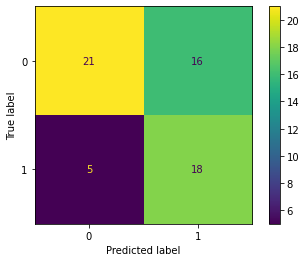

In [ ]:
plot_confusion_matrix(lr, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


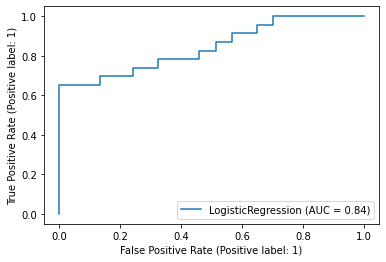

In [ ]:
plot_roc_curve(lr,X_test, y_test)
plt.show()

In [ ]:
#decisioin tree evaluation
print(classification_report(y_test, y_pred_dtr_test))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        37
           1       0.65      0.65      0.65        23

    accuracy                           0.73        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.73      0.73      0.73        60



In [ ]:
dtr_acc= accuracy_score(y_test, y_pred_dtr_test)

dtr_prec = precision_score(y_test, y_pred_dtr_test)
dtr_rec = recall_score(y_test, y_pred_dtr_test)
dtr_f1 = f1_score(y_test, y_pred_dtr_test)
dtr_results =pd.DataFrame([['Decisiontree Classifier',dtr_acc, dtr_prec,dtr_rec,dtr_f1]],
               columns = ['Model', 'Accuracy','Precision','Recall','F1 Score'])
dtr_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decisiontree Classifier,0.733333,0.652174,0.652174,0.652174


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


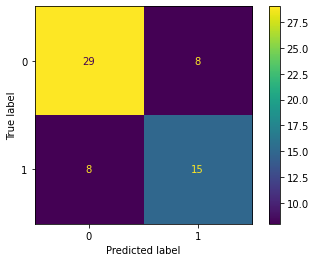

In [ ]:
plot_confusion_matrix(dtr, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


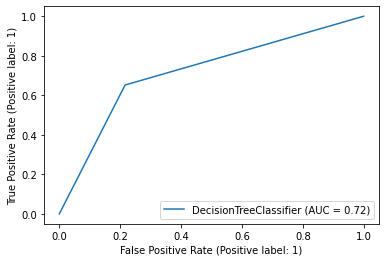

In [ ]:
plot_roc_curve(dtr,X_test, y_test)
plt.show()

In [ ]:
#random forest
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        37
           1       0.78      0.61      0.68        23

    accuracy                           0.78        60
   macro avg       0.78      0.75      0.76        60
weighted avg       0.78      0.78      0.78        60



In [ ]:
rf_acc= accuracy_score(y_test, y_pred_rf_test)

rf_prec = precision_score(y_test, y_pred_rf_test)
rf_rec = recall_score(y_test, y_pred_rf_test)
rf_f1 = f1_score(y_test, y_pred_rf_test)

rf_results =pd.DataFrame([['Random Forest',rf_acc,rf_prec,rf_rec,rf_f1]],
               columns = ['Model', 'Accuracy','Precision','Recall','F1 Score'])

rf_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.783333,0.777778,0.608696,0.682927


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


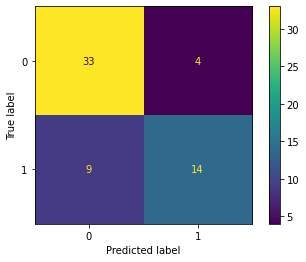

In [ ]:
plot_confusion_matrix(rf, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


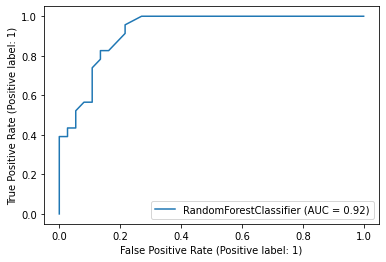

In [ ]:
plot_roc_curve(rf,X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_svm_test))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        37
           1       0.60      0.78      0.68        23

    accuracy                           0.72        60
   macro avg       0.72      0.73      0.71        60
weighted avg       0.74      0.72      0.72        60



In [ ]:
svm_acc= accuracy_score(y_test, y_pred_svm_test)

svm_prec = precision_score(y_test, y_pred_svm_test)
svm_rec = recall_score(y_test, y_pred_svm_test)
svm_f1 = f1_score(y_test, y_pred_svm_test)
svm_results =pd.DataFrame([['SVM',svm_acc,svm_prec,svm_rec,svm_f1]],
               columns = ['Model', 'Accuracy','Precision','Recall','F1 Score'])
svm_results

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.716667,0.6,0.782609,0.679245


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


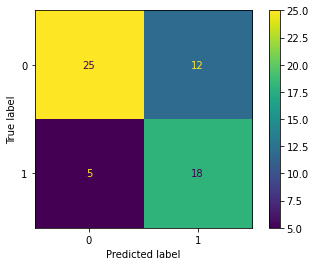

In [ ]:
plot_confusion_matrix(svm, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


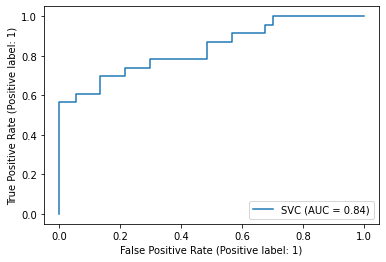

In [ ]:
plot_roc_curve(svm,X_test, y_test)
plt.show()

**CROSS VALIDATION**

In [ ]:
#cross validating logistic regression
lr_crossvalidation=LogisticRegression(class_weight="balanced")
lr_crossvalidation_score = cross_val_score(lr_crossvalidation, X,y,cv=10)
lr_crossvalidation_score
print(lr_crossvalidation)


In [ ]:
lr_crossvalidation_score.mean()

0.7422988505747126

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred_lr = cross_val_predict(lr_crossvalidation, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred_lr)

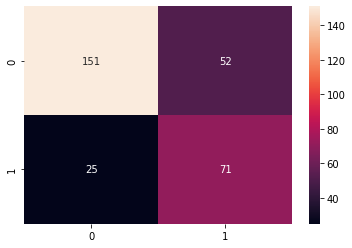

In [ ]:
sns.heatmap(conf_mat, annot=True, fmt= '2.0f')

In [ ]:
#cross validating decision tree
dtr_crossvalidation=DecisionTreeClassifier(criterion='entropy', random_state=1,class_weight="balanced")

dtr_crossvalidation_score = cross_val_score(dtr_crossvalidation, X,y,cv=10)

dtr_crossvalidation_score.mean()



0.6689655172413793

In [ ]:
y_pred_dtr = cross_val_predict(dtr_crossvalidation, X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred_dtr), annot=True,fmt= '2.0f')

NameError: ignored

In [ ]:
#cross validating random classifier
rf_crossvalidation=RandomForestClassifier(criterion='entropy',n_estimators=100,class_weight='balanced')
rf_crossvalidation_score = cross_val_score(rf_crossvalidation, X,y,cv=10)
rf_crossvalidation_score.mean()

0.7689655172413794

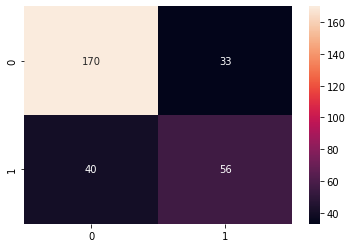

In [ ]:
y_pred_rf = cross_val_predict(rf_crossvalidation, X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred_rf), annot=True,fmt= '2.0f')

In [ ]:
#cross validating svc
svm_crossvalidation=SVC(kernel='linear',class_weight='balanced')
svm_crossvalidation_score=cross_val_score(svm_crossvalidation,X,y, cv=10)
svm_crossvalidation_score.mean()

0.6956321839080459

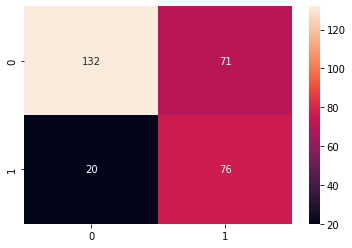

In [ ]:
y_pred_svm = cross_val_predict(svm_crossvalidation, X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred_svm), annot=True,fmt= '2.0f')